#***DISTRIBUCIÓN BINOMINAL NEGATIVA***
***Integrantes:***

*Johanna Katterine Moreno Angarita*

*Nicolás Daniel Ramirez Camargo*

*Daniel Mauricio Rodriguez Verdugo*

*Brayan Steven Sossa Giraldo*

*Juan Daniel Toro Arteaga*



---



In [109]:
#@title - *Librerías*

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import sympy as sp
from sympy import symbols, binomial, latex
from IPython.display import display, Math

## ***¿Qué es la distribución binomial negativa?***

Es un modelo probabilístico que describe el número de **fracasos** que ocurren antes de alcanzar un número fijo de **éxitos**, en una serie de intentos independientes, donde cada intento tiene la misma probabilidad de éxito.

Pertenece al conjunto de las **distribuciones discretas**, ya que modela una variable aleatoria que solo puede tomar valores enteros *(cómo 0, 1, 2, 3...)*.



---


## ***¿Qué tipo de situaciones modela?***

Cualquier proceso que implique repeticiones del mismo experimento hasta lograr un objetivo determinado. Es útil cuando no sabemos cuántos intentos serán necesarios, pero sí sabemos **cuántos éxitos queremos lograr**.

Ejemplos:


*   Número de *rechazos antes de lograr* ***3 ventas***.
*   Número de *tiros fallidos antes de* ***encestar 5 veces***.
*   Número de *entrevistas fallidas antes de* ***contratar a 2 personas***.
---



## ***Ejemplo aplicado***

Vamos a ver un ejemplo simulado aplicado a las ciencias económicas

Mariana es una asesora financiera que llama a clientes y debe cerrar 3 ventas. Cada llamada tiene una probabilidad del 30% de éxito.

Ella realiza llamadas hasta lograr 3 ventas, pero **no sabe cuántos rechazos enfrentará antes de conseguirlas**.

En este caso:

*   La variable aleatoria **X** es el numéro de **rechazos** (**fracasos**) antes de 3 **ventas** (**éxitos**).
*  **r = 3** (número de éxitos deseados)
*   **p = 0.3** (probabilidad de éxito por intento)



---





## ***Fundamentos del modelo***

## **Función de masa de probabilidad**

Describe la probabilidad de tener **x** fracasos antes de lograr **r** éxitos.

In [110]:
#@title - *Fórmula*

x, r, p = symbols('x r p')
pmf = binomial(r + x - 1, x) * (1 - p)**x * p**r
display(Math(r"\textbf{\textit{Formula general función de masa de probabilidad:}}\\[5pt] " + r"P(X = x) = \binom{r + x - 1}{x} \cdot (1 - p)^x \cdot p^r"))





<IPython.core.display.Math object>

**Dónde:**

**x**: número de fracasos antes de lograr **r** éxitos.

**p**: probabilidad de éxito por intento.

**r**: número de éxitos deseados.

**((r-1+x)/x)**: número de maneras de distribuir los fracasos antes del último éxito.

---



Vamos a suponer que queremos saber la probabilidad de que Mariana tenga 4 rechazos antes de cerrar 3 ventas:

In [111]:
#@title - *Fórmula aplicada*

x = 4
r = 3
p = 0.3
pmf_aplicada = binomial(r + x - 1, x) * (1 - p)**x * p**r
display(Math(r"\textbf{\textit{Función de masa de probabilidad aplicada al ejemplo:}}\\[5pt]" +
              fr"P(X = {x}) = \binom{{{r + x - 1}}}{{{x}}} \cdot (1 - {p})^{x} \cdot ({p})^{r}"))


<IPython.core.display.Math object>

**Dónde reemplazamos:**

**x**: 4 (*los rechazos que queremos evaluar*)

**p**: 0.3 (*el 30% de probabilidad de éxito de cada llamada*)

**r**: 3 (*meta de ventas*)

In [112]:
#@title - *Resultado*
x, r, p = symbols('x r p')
pmf = binomial(r + x - 1, x) * (1 - p)**x * p**r
pmf_con_valores = pmf.subs({r: 3, x: 4, p: 0.3})
display(Math(r"\textbf{\textit{Resultado de la función de masa de probabilidad para el ejemplo:}}\\[5pt] " "P(X = 4) = " + latex(pmf_con_valores)))


<IPython.core.display.Math object>

Mariana tiene una probabilidad del **9,72%** de recibir **exactamente 4 rechazos** antes de cerrar sus **3 ventas**.

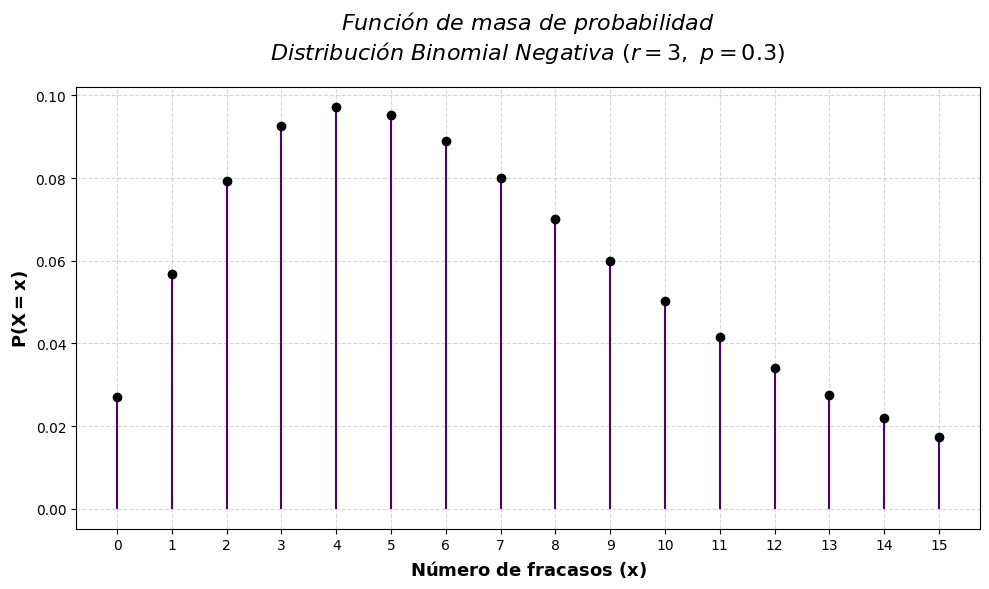

In [113]:
#@title - *Código gráfico función de masa de probabilidad*
r = 3
p = 0.3

x_vals = np.arange(0, 16)
pmf_vals = nbinom.pmf(x_vals, r, p)

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(x_vals, pmf_vals, basefmt=" ")
plt.setp(markerline, marker='o', markersize=6, color='black')
plt.setp(stemlines, linestyle='-', color='indigo')
plt.title(r"$\bf{\it{Función\ de\ masa\ de\ probabilidad}}$" + "\n" +
          r"$\it{Distribución\ Binomial\ Negativa\ (r=3,\ p=0.3)}$",
          fontsize=16, pad=20)
plt.xlabel(r"$\bf{Número\ de\ fracasos\ (x)}$", fontsize=13)
plt.ylabel(r"$\bf{P(X = x)}$", fontsize=13)
plt.xticks(x_vals)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Valor esperado**

¿Cuántos fracasos se esperan antes de lograr **r** éxitos?

In [114]:
#@title - *Fórmula*

r, p = symbols('r p')
E_X = r * (1 - p) / p
display(Math(r"\textbf{\textit{Fórmula general del valor esperado:}}\\[5pt] ""\mathbb{E}[X] = " + latex(E_X)))



<IPython.core.display.Math object>

**Dónde:**

**p**: probabilidad de éxito por intento.

**r**: número de éxitos deseados.

---


In [115]:
#@title - *Fórmula aplicada*

E_X_val = E_X.subs({r: 3, p: 0.3})
display(Math(r"\textbf{\textit{Fórmula del valor esperado aplicado al ejemplo:}}\\[5pt] "
             r"\mathbb{E}[X] = \frac{3(1 - 0.3)}{0.3}"))

<IPython.core.display.Math object>

In [116]:
#@title - *Resultado*


r, p = symbols('r p')
E_X = r * (1 - p) / p
display(Math(fr"\textbf{{\textit{{Resultado del valor esperado aplicado al ejemplo:}}}}\\[5pt] \mathbb{{E}}[X] = {E_X_val}"))

<IPython.core.display.Math object>

En este caso se espera que Mariana reciba **7 rechazos antes de lograr las 3 ventas.**

## **Varianza**

¿Qué tanto varía el número de fracasos entre distintos intentos del experimento?

In [117]:
#@title - *Fórmula*

display(Math(r"\textbf{\textit{Varianza de la binomial negativa:}}\\[5pt] \mathrm{Var}(X) = \frac{r(1 - p)}{p^2}"))


<IPython.core.display.Math object>

**Dónde:**

**p**: probabilidad de éxito por intento.

**r**: número de éxitos deseados.

---


In [118]:
#@title - *Fórmula aplicada*

r = 3
p = 0.3
display(Math(fr"\textbf{{\textit{{Varianza aplicada al ejemplo:}}}}\\[5pt] \mathrm{{Var}}(X) = \frac{{{r}(1 - {p})}}{{{p}^2}}"))


<IPython.core.display.Math object>

In [119]:
#@title - *Resultado*

r = 3
p = 0.3
varianza = r * (1 - p) / (p ** 2)
latex_result = fr"\textbf{{\textit{{Resultado de la varianza aplicada al ejemplo:}}}}\\[5pt] \mathrm{{Var}}(X) = \frac{{{r}(1 - {p})}}{{{p}^2}} = {varianza:.4f}"
display(Math(latex_result))

<IPython.core.display.Math object>

En este caso, la varianza de 23.3 nos indica que el número de llamadas fallidas **puede variar bastante**.

Esto es consecuente con el ejemplo porque la probabilidad establecida es baja.

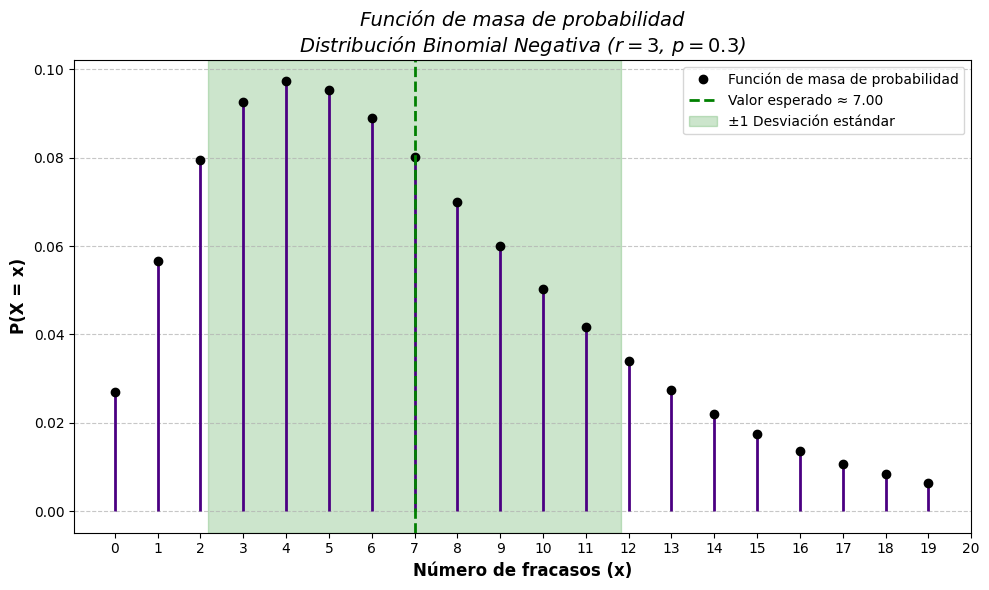

In [120]:
#@title - *Gráfica conjunta*

r = 3
p = 0.3

mean = r * (1 - p) / p
var = r * (1 - p) / (p ** 2)
std_dev = np.sqrt(var)

x = np.arange(0, 20)
pmf = nbinom.pmf(x, r, p)

plt.figure(figsize=(10, 6))
plt.vlines(x, 0, pmf, colors='indigo', lw=2)
plt.plot(x, pmf, 'ko', label='Función de masa de probabilidad')

plt.axvline(mean, color='green', linestyle='--', linewidth=2, label=f'Valor esperado ≈ {mean:.2f}')

plt.axvspan(mean - std_dev, mean + std_dev, color='green', alpha=0.2, label=f'±1 Desviación estándar')

plt.title('Función de masa de probabilidad\nDistribución Binomial Negativa ($r=3$, $p=0.3$)', fontsize=14, style='italic')
plt.xlabel('Número de fracasos (x)', fontsize=12, weight='bold')
plt.ylabel('P(X = x)', fontsize=12, weight='bold')
plt.xticks(np.arange(0, 21, 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Este gráfico representa de manera más clara la función de masa de probabilidad de la distribución con los parametros del ejemplo.

La linea vertical marca el valor esperado, en este caso y ya explicado: **7**.

El área sombreada muestra la varianza, señalando que es probable que el número de fracasos varíe ampliamente entre los intentos.



---



## **Función generadora de momentos**

Sirve para encontrar los momentos de una variable aleatoria. Derivar propiedades como esperanza (media) y varianza de manera algebráica.



In [121]:
#@title - *Fórmula*

display(Math(r"\textbf{\textit{Fórmula función generadora de momentos:}}\\[5pt] M_X(t) = \left( \frac{p}{1 - (1 - p)e^t} \right)^r"))

<IPython.core.display.Math object>

**Dónde:**

**p**: probabilidad de éxito por intento.

**r**: número de éxitos deseados.

**e**: número euler *(se usa en este tipo de funciones por cómo crecen exponencialmente las probabilidades)*

**t**: variable auxiliar *(sirve para derivar la fórmula y extraer los momentos)*

---


**¿Para qué nos sirve?**


*   Derivar momentos de una distribución (como la media, la varianza, etc)
*   Probar propiedades de distribuciones en teoría de probabilidad
*   Distinguir distribuciones


En este caso ya conocemos la media y la varianza por fórmula directa, no hace falta derivarlas, no estamos comparando distribuciones.

## **Función de distibución acumulada**

Estimar la probabilidad de recibir a lo sumo cierta cantidad de rechazos antes lograr **r** éxitos.



In [122]:
#@title - *Fórmula*

display(Math(r"\textbf{\textit{Formula de la función de distribución acumulada:}}\\[5pt] "
             r"F(x) = P(X \leq x) = \sum_{k=0}^{x} \binom{k + r - 1}{k} \cdot (1 - p)^k \cdot p^r"))

<IPython.core.display.Math object>

**Dónde:**

**x**: número de fracasos aculuados (a lo sumo).

**p**: probabilidad de éxito por intento.

**r**: número de éxitos deseados.

**k**: variable auxiliar *(recorre todos los valores posibles valores de fracasos desde 0 hasta x, sirve para sumar las probabilidades individuales (la que cambia en la sumatoria)*.

---


Supongamos que queremos saber cuál es la probabilidad de que reciba como máximo 10 rechazos antes de lograr sus 3 ventas.

In [123]:
#@title - *Fórmula aplicada*

k = symbols('k')
r = 3
p = 0.3
x = 10
expr = Sum(binomial(k + r - 1, k) * (1 - p)**k * p**r, (k, 0, x))
display(Math(r"\textbf{\textit{Función de distribución acumulada aplicada al ejemplo:}}\\[5pt] "
             r"P(X \leq 10) = \sum_{k=0}^{10} \binom{k + 2}{k} \cdot (1 - 0.3)^k \cdot (0.3)^3"))


<IPython.core.display.Math object>

In [124]:
#@title - *Resultado*

r = 3
p = 0.3
x = 10

prob_acumulada = nbinom.cdf(x, r, p)
print(f"La probabilidad de que Mariana reciba como máximo {x} rechazos antes de lograr {r} ventas es: {prob_acumulada:.4f}")


La probabilidad de que Mariana reciba como máximo 10 rechazos antes de lograr 3 ventas es: 0.7975


Mariana tiene aproximadamente **79.75%** de probabilidad de **lograr sus 3 ventas antes de recibir 10 rechazos.**

Conocer esa probabilidad nos sirve para definir un límite razonable de tolerancia al rechazo antes de evaluar si seguir o corregir el camino.

##**Simulación computacional**

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

r_1 = 3
p_1 = 0.3
size = 1000

sim_1 = nbinom.rvs(r_1, p_1, size=size)

r_2 = 3
p_2 = 0.5
sim_2 = nbinom.rvs(r_2, p_2, size=size)

r_3 = 5
p_3 = 0.3
sim_3 = nbinom.rvs(r_3, p_3, size=size)

x = np.arange(0, max(sim_1.max(), sim_2.max(), sim_3.max()) + 1)

## **Primer escenario: r = 3 y p = 0.3**

Mariana necesita hacer 3 ventas, cada llamada tiene un 30% de probabilidad de éxito.

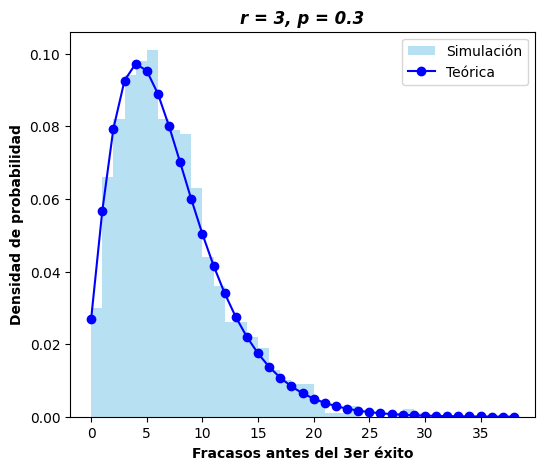

In [126]:
plt.figure(figsize=(6, 5))
plt.hist(sim_1, bins=range(0, max(sim_1)+2), density=True, alpha=0.6, color='skyblue', label='Simulación')
plt.plot(x, nbinom.pmf(x, r_1, p_1), 'o-', color='blue', label='Teórica')
plt.title('r = 3, p = 0.3', fontweight='bold', style='italic')
plt.xlabel('Fracasos antes del 3er éxito', fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontweight='bold')
plt.legend()
plt.show()

Mariana tiene una probabilidad baja de éxito. Se observan más fracasos antes de lograr sus ventas.

La distribución es más amplia y desplazada hacia la derecha.

## **Segundo escenario: r = 3 y p = 0.5**

Mariana necesita hacer 3 ventas, cada llamada tiene un 50% de probabilidad de éxito.

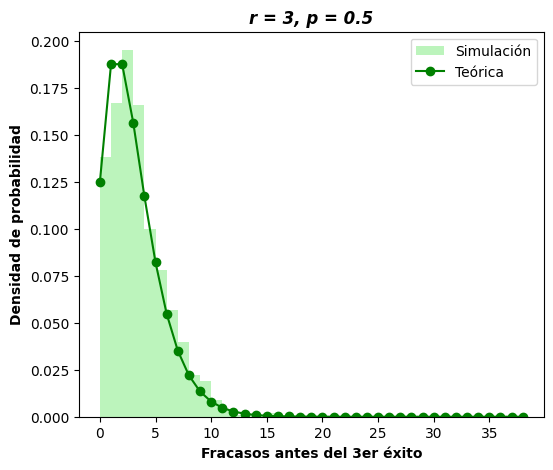

In [127]:
plt.figure(figsize=(6, 5))
plt.hist(sim_2, bins=range(0, max(sim_2)+2), density=True, alpha=0.6, color='lightgreen', label='Simulación')
plt.plot(x, nbinom.pmf(x, r_2, p_2), 'o-', color='green', label='Teórica')
plt.title('r = 3, p = 0.5', fontweight='bold', style='italic')
plt.xlabel('Fracasos antes del 3er éxito', fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontweight='bold')
plt.legend()
plt.show()

La efectividad mejora (la probabilidad de éxito sube), disminuyen los fracasos. La curva se desplaza hacia la izquierda.

La distribución es más concentrada.

## **Tercer escenario: r = 5 y p = 0.3**

Mariana necesita hacer 5 ventas, cada llamada tiene un 30% de probabilidad de éxito.

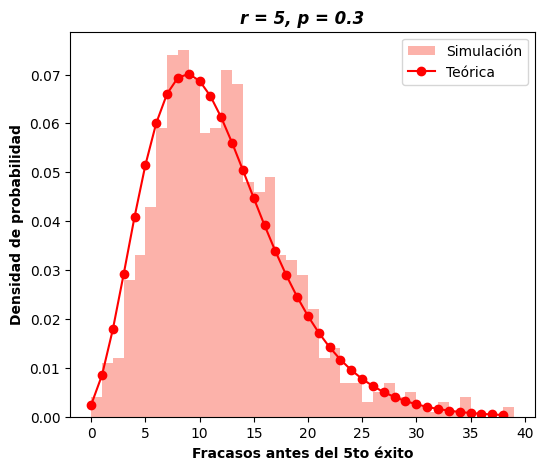

In [128]:
plt.figure(figsize=(6, 5))
plt.hist(sim_3, bins=range(0, max(sim_3)+2), density=True, alpha=0.6, color='salmon', label='Simulación')
plt.plot(x, nbinom.pmf(x, r_3, p_3), 'o-', color='red', label='Teórica')
plt.title('r = 5, p = 0.3', fontweight='bold', style='italic')
plt.xlabel('Fracasos antes del 5to éxito', fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontweight='bold')
plt.legend()
plt.show()

Al aumentar el número de ventas requeridas se eleva el número esperado de fracasos.

La curva se ensancha, lo cual indica mayor varianza.

# **CONCLUSIÓN**

La distribución binomial negativa es una herramienta estadística poderosa para modelar procesos donde el interés radica en contar fracasos antes de alcanzar un número fijo de éxitos.


Su aplicabilidad en contextos reales, como ventas, atención al cliente o reclutamiento, permite anticipar comportamientos y tomar decisiones basadas en evidencia probabilística.


Comprender su lógica, propiedades y comportamiento computacional no solo fortalece el análisis cuantitativo, sino que también traduce el azar en conocimiento útil para la acción estratégica.


---



## **Principal Fortaleza**

Nos permite anticipar el comportamiento de procesos aleatorios repetitivos.



---



## **Principal Limitación**

Exige que cada intento sea independiente y con la misma probabilidad de éxito.



---


### ***¿QUÉ OTRAS SITUACIONES ECONÓMICAS O SOCIALES CREEN QUE PUEDAN REPRESENTARSE POR EL NÚMERO DE FRACASOS ANTES DE LOGRAR ALGO?***